# Definición problema:

Queremos crear un modelo (en este caso solo hay que hacer el EDA) capaz de predecir, si un cliente va a tener dificultades para devolver un préstamo bancario.



## Comprobaciones sistema, librerias, datasets

In [1]:
# Comprobamos la verisión de python con la que estamos trabajando y donde se está ejecutando 
import sys

print(sys.version)
print(sys.path)
print("---")
print(sys.executable)

3.8.20 (default, Oct  3 2024, 10:25:41) 
[Clang 14.0.6 ]
['/opt/miniconda3/envs/aa_p2_eda/lib/python38.zip', '/opt/miniconda3/envs/aa_p2_eda/lib/python3.8', '/opt/miniconda3/envs/aa_p2_eda/lib/python3.8/lib-dynload', '', '/opt/miniconda3/envs/aa_p2_eda/lib/python3.8/site-packages', '/opt/miniconda3/envs/aa_p2_eda/lib/python3.8/site-packages/setuptools/_vendor']
---
/opt/miniconda3/envs/aa_p2_eda/bin/python


In [2]:
## Importación librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")

## Configuro la visualización de mis datasets
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
### Leer el dataset y un primer vistazo 
df_loan_apli = pd.read_csv('./data/application_data.csv')
df_loan_apli.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
### Analizar si hay variables a futuro 




# Análisis general de las tablas

In [4]:
print(df_loan_apli.shape, df_loan_apli.drop_duplicates().shape)

(307511, 122) (307511, 122)


In [5]:
print(f'Distribución de clases: ')
df_loan_apli.dtypes.sort_values().to_frame('features').groupby('features').size().to_frame('quantity').reset_index()

## necesito transformarlo en un vec col con to_frame para poder agrupar por el nombre de la col 

Distribución de clases: 


,features,quantity
0,int64,41
1,float64,65
2,object,16


# Exploración de la variable objetivo y tratamiento 

In [6]:
df_target_distribution = df_loan_apli['TARGET'].to_frame('Solvency_label').value_counts().to_frame('Quantity').reset_index()
df_target_distribution

,Solvency_label,Quantity
0,0,282686
1,1,24825


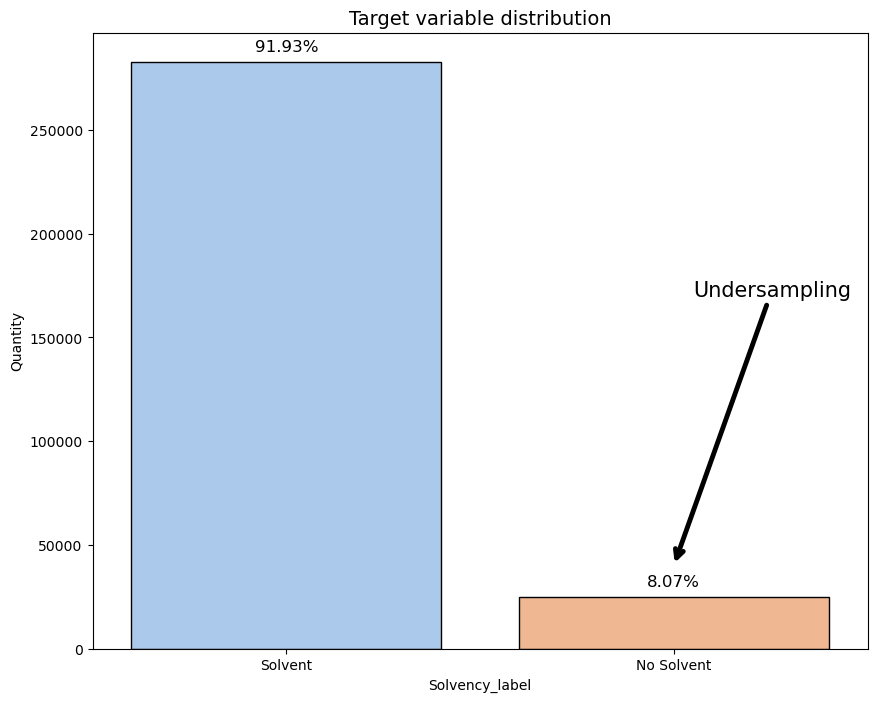

In [7]:
plt.figure(figsize=(10,8))

(sns.barplot(x=df_target_distribution.Solvency_label, 
             y=df_target_distribution.Quantity, 
             palette='pastel', edgecolor='black'))

# Añadir etiquetas y título
plt.title(f'Target variable distribution', fontsize=14)
# Cambiar las etiquetas del eje X
plt.xticks(ticks=[0, 1], labels=['Solvent', 'No Solvent'])

# Añadir ana anotación con flecha dentro del gráfico 
plt.annotate('Undersampling',
             xy= (1, 40000), xytext= (1.05, 170000), fontsize=15,
             arrowprops=dict(
                 arrowstyle = '->',
                 color = 'black',
                 lw = 3.5))     ## ancho flecha

total = df_target_distribution.Quantity.sum()
for i, value in enumerate(df_target_distribution.Quantity): ## con enumerate() itero sobre un objeto añadiendo un contador (índice)
    percentage = f"{(value / total) * 100:.2f}%"  # Calcular porcentaje
    plt.text(i, value + 5000, percentage, 
             ha='center', fontsize=12, color='black')  # Añadir texto

plt.show()

# Selección de threshold por filas y columnas para eliminar los valores missing

In [8]:
### Analizamos las cantidad de valores nulos por columna
df_nulos_col = df_loan_apli.isnull().sum().to_frame('Nulos').sort_values(by='Nulos', ascending=False).reset_index(names='Variables')
df_nulos_col['Porcentaje'] = (df_nulos_col['Nulos'] * 100 / df_loan_apli.shape[0]).round(2)
df_nulos_col

,Variables,Nulos,Porcentaje
0,COMMONAREA_MEDI,214865,69.87
1,COMMONAREA_AVG,214865,69.87
2,COMMONAREA_MODE,214865,69.87
3,NONLIVINGAPARTMENTS_MODE,213514,69.43
4,NONLIVINGAPARTMENTS_AVG,213514,69.43
5,NONLIVINGAPARTMENTS_MEDI,213514,69.43
6,FONDKAPREMONT_MODE,210295,68.39
7,LIVINGAPARTMENTS_MODE,210199,68.35
8,LIVINGAPARTMENTS_AVG,210199,68.35
9,LIVINGAPARTMENTS_MEDI,210199,68.35


In [23]:
# Identificar columnas con más de 100 valores nulos
condicion = df_loan_apli.isnull().sum() > 100
# Obtener los nombres de las columnas que cumplen la condición
columnas_nulas = df_loan_apli.columns[condicion].tolist()

# Mostrar los nombres de las columnas
print(columnas_nulas)


['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREM

In [ ]:
import funciones

for i in columnas_nulas:
    funciones.graficar_NAN_distribucion_target(df_loan_apli, i)

In [ ]:
# Crear una lista vacía para almacenar los resultados
lista_resultados = []

# Iterar sobre las columnas con valores nulos
for i in columnas_nulas:
    resultado = funciones.calcular_porcentaje_target(df_loan_apli, i)
    lista_resultados.append(resultado)


In [31]:
# Convertir la lista de resultados en un DataFrame separado
df_porcentajes = pd.DataFrame(lista_resultados, columns=['Variables', 'Porcentaje TARGET=1'])

df_nulos_col_target = df_nulos_col.merge(df_porcentajes, on='Variables', how='left')
df_nulos_col_target

,Variables,Nulos,Porcentaje,Porcentaje TARGET=1
0,COMMONAREA_MEDI,214865,69.87,8.57
1,COMMONAREA_AVG,214865,69.87,8.57
2,COMMONAREA_MODE,214865,69.87,8.57
3,NONLIVINGAPARTMENTS_MODE,213514,69.43,8.58
4,NONLIVINGAPARTMENTS_AVG,213514,69.43,8.58
5,NONLIVINGAPARTMENTS_MEDI,213514,69.43,8.58
6,FONDKAPREMONT_MODE,210295,68.39,8.62
7,LIVINGAPARTMENTS_MODE,210199,68.35,8.62
8,LIVINGAPARTMENTS_AVG,210199,68.35,8.62
9,LIVINGAPARTMENTS_MEDI,210199,68.35,8.62


En la tabla podemos ver: 
- La cantidad de nulos 
- El porcentaje TARGET=1 cuando solo usamos esos valores nulos 

Teniendo en cuneta que la varible objetivo con TARGET = 1 representaba un 8.07% de los casos.Podemos ver que hay muchas columnas que aparte de tener una gran cantidad de nulos, no aportan ninguna información ya que la distribución se mantiene muy similar, es decir, que seguramente esté determinada por la alaetoriedad. 

Con esto voy a determinar el umbaral en un 66% de nulos porque apartir de ahí la distribución del target enmpieza a ser intersente guardarla. Quiero guardar la varible: 'OWN_CAR_AGE' porque creo que podría ser relevante



In [32]:
## Como todas las columnas contienen una información siginificativa, no voy a eliminar ninguna 
## de todas maneras voy a hacer el proceso poner un umbral para entender como funciona y poder 
## ir variandolo si necesitara alguna información . 

threshold = 66
list_vars_not_null = list(df_nulos_col[df_nulos_col['Porcentaje']<threshold]['Variables'])

df_loan_filt_null = df_loan_apli.loc[:, list_vars_not_null]
print(df_loan_filt_null.shape)
df_loan_filt_null

(307511, 106)


,OWN_CAR_AGE,LANDAREA_MEDI,LANDAREA_MODE,LANDAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,BASEMENTAREA_MODE,EXT_SOURCE_1,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,ELEVATORS_MEDI,ELEVATORS_AVG,ELEVATORS_MODE,WALLSMATERIAL_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,APARTMENTS_MODE,ENTRANCES_MEDI,ENTRANCES_AVG,ENTRANCES_MODE,LIVINGAREA_AVG,LIVINGAREA_MODE,LIVINGAREA_MEDI,HOUSETYPE_MODE,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,FLAG_DOCUMENT_8,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_CREDIT,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_EMAIL,FLAG_CONT_MOBILE,ORGANIZATION_TYPE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR
0,NaN,0.0375,0.0377,0.0369,0.0369,0.0369,0.0383,0.083037,0.0000,0.0000,0.0000,0.00,0.00,0.0000,"Stone, brick",0.0250,0.0247,0.0252,0.0690,0.0690,0.0690,0.0190,0.0198,0.0193,block of flats,0.0833,0.0833,0.0833,0.9722,0.9722,0.9722,0.0149,No,Laborers,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,0,Cash loans,M,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,406597.5,202500.0,1,0,0,1,0,0,0,0,10,WEDNESDAY,2,2,0,1,Business Entity Type 3,0,1,1,-2120,-3648.0,-637,-9461,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,100002
1,NaN,0.0132,0.0128,0.0130,0.0529,0.0529,0.0538,0.311267,0.0000,0.0098,0.0100,0.08,0.08,0.0806,Block,0.0968,0.0959,0.0924,0.0345,0.0345,0.0345,0.0549,0.0554,0.0558,block of flats,0.2917,0.2917,0.2917,0.9851,0.9851,0.9851,0.0714,No,Core staff,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Family,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,0,Cash loans,F,N,0,1,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,1293502.5,270000.0,1,0,0,0,0,0,0,0,11,MONDAY,1,1,0,1,School,0,1,1,-291,-1186.0,-1188,-16765,0.003541,House / apartment,Married,Higher education,State servant,100003
2,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,0,Revolving loans,M,Y,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,135000.0,67500.0,1,0,0,0,0,0,0,0,9,MONDAY,2,2,0,1,Government,1,1,1,-2531,-4260.0,-225,-19046,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,100004
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unaccompanied,2.0,0.0,2.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,0,0,Cash loans,F,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,312682.5,135000.0,0,0,0,0,0,0,0,0,17,WEDNESDAY,2,2,0,1,Business Entity Type 3,0,1,1,-2437,-9833.0,-3039,-19005,0.008019,House / apartment,Civ

In [13]:
## Ahora vamos a realizar un proceso parecido con los valore faltantes en las filas 
series_null_rows = df_loan_apli.isnull().sum(axis=1).sort_values(ascending=False)
print(series_null_rows.shape)
print(series_null_rows.head())

(307511,)
185713    61
133770    61
197736    61
116937    61
269492    61
dtype: int64


In [14]:
df_null_filas = pd.DataFrame(series_null_rows, columns=['Nulos_filas'])  
df_null_filas['Target'] = df_loan_apli['TARGET'].copy()
df_null_filas['Porcentaje_filas'] = df_null_filas['Nulos_filas']/df_loan_apli.shape[1]
df_null_filas

,Nulos_filas,Target,Porcentaje_filas
185713,61,0,0.5
133770,61,0,0.5
197736,61,0,0.5
116937,61,0,0.5
269492,61,0,0.5
...,...,...,...
129942,0,0,0.0
129929,0,0,0.0
129924,0,0,0.0
129911,0,0,0.0


# Tipos: Variables categóricas y numéricas

In [15]:
print(os.getcwd())
print(os.listdir())  # Muestra todos los archivos y carpetas en el directorio actual

/Users/josetunon/Desktop/ciencia_de_datos/aprendizaje_automatico/practica1_EDA
['.DS_Store', 'funciones.py', '__pycache__', 'README.md', '.git', 'Inicio.ipynb', 'data']


In [16]:
## Primer vistazo para saber que clases tengo en mi dataset 
# Las que voy a tener que analizar principalmente son las clases obejto para determinar si son 
    # Binarias 
    # Categóricas
        # Nominales 
        # Ordinales --> podría valorar si transformarlas a numércias 
    # Variables de texto libre / con alta cardinalidad
    # Fechas / Numéricas puestas como string
df_loan_filt_null.dtypes.sort_values().to_frame('Clases').groupby('Clases').size().to_frame('Conteo').reset_index()

,Clases,Conteo
0,int64,41
1,float64,65
2,object,16


In [39]:
import funciones

lista_var_categoricas , lista_var_altas_dimensiones = funciones.dame_variables_categoricas(df_loan_filt_null)
df_loan_filt_null[lista_var_categoricas] = df_loan_filt_null[lista_var_categoricas].astype('category')

### Todas las variables no numéricas son categóricas, lo cual me facilita el trabajo 
print(len(lista_var_categoricas))
df_loan_filt_null[lista_var_categoricas]

16


,FONDKAPREMONT_MODE,WALLSMATERIAL_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,NAME_TYPE_SUITE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE
0,reg oper account,"Stone, brick",block of flats,No,Laborers,Unaccompanied,Cash loans,M,N,Y,WEDNESDAY,Business Entity Type 3,House / apartment,Single / not married,Secondary / secondary special,Working
1,reg oper account,Block,block of flats,No,Core staff,Family,Cash loans,F,N,N,MONDAY,School,House / apartment,Married,Higher education,State servant
2,NaN,NaN,NaN,NaN,Laborers,Unaccompanied,Revolving loans,M,Y,Y,MONDAY,Government,House / apartment,Single / not married,Secondary / secondary special,Working
3,NaN,NaN,NaN,NaN,Laborers,Unaccompanied,Cash loans,F,N,Y,WEDNESDAY,Business Entity Type 3,House / apartment,Civil marriage,Secondary / secondary special,Working
4,NaN,NaN,NaN,NaN,Core staff,Unaccompanied,Cash loans,M,N,Y,THURSDAY,Religion,House / apartment,Single / not married,Secondary / secondary special,Working
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,reg oper account,"Stone, brick",block of flats,No,Sales staff,Unaccompanied,Cash loans,M,N,N,THURSDAY,Services,With parents,Separated,Secondary / secondary special,Working
307507,reg oper account,"Stone, brick",block of flats,No,NaN,Unaccompanied,Cash loans,F,N,Y,MONDAY,XNA,House / apartment,Widow,Secondary / secondary special,Pensioner
307508,reg oper account,Panel,block of flats,No,Managers,Unaccompanied,Cash loans,F,N,Y,THURSDAY,School,House / apartment,Separated,Higher education,Working
307509,NaN,"Stone, brick",block of flats,No,Laborers,Unaccompanied,Cash loans,F,N,Y,WEDNESDAY,Business Entity Type 1,House / apartment,Married,Secondary / secondary special,Commercial associate


In [ ]:
df_categoricas_unicos = pd.DataFrame(df_loan_filt_null[lista_var_categoricas].nunique(), columns=['n_unicos']).reset_index(names='variables')
df_categoricas_unicos
### Aquí podemos hacer una idea de como realizaremos el tratamiento 

,variables,n_unicos
0,FONDKAPREMONT_MODE,4
1,WALLSMATERIAL_MODE,7
2,HOUSETYPE_MODE,3
3,EMERGENCYSTATE_MODE,2
4,OCCUPATION_TYPE,18
5,NAME_TYPE_SUITE,7
6,NAME_CONTRACT_TYPE,2
7,CODE_GENDER,3
8,FLAG_OWN_CAR,2
9,FLAG_OWN_REALTY,2


In [71]:
columnas_binarias = df_categoricas_unicos[df_categoricas_unicos['n_unicos'] == 2]['variables'].tolist()

for colbi in columnas_binarias:
    print(f'{colbi}')
    print(df_loan_filt_null[colbi].unique())


EMERGENCYSTATE_MODE
['No', NaN, 'Yes']
Categories (2, object): ['No', 'Yes']
NAME_CONTRACT_TYPE
['Cash loans', 'Revolving loans']
Categories (2, object): ['Cash loans', 'Revolving loans']
FLAG_OWN_CAR
['N', 'Y']
Categories (2, object): ['N', 'Y']
FLAG_OWN_REALTY
['Y', 'N']
Categories (2, object): ['N', 'Y']


In [73]:
for col in lista_var_categoricas:
    print(f'{df_loan_filt_null[col].value_counts()}')

FONDKAPREMONT_MODE
reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: count, dtype: int64
WALLSMATERIAL_MODE
Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: count, dtype: int64
HOUSETYPE_MODE
block of flats      150503
specific housing      1499
terraced house        1212
Name: count, dtype: int64
EMERGENCYSTATE_MODE
No     159428
Yes      2328
Name: count, dtype: int64
OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen st

In [ ]:
# Filtrar columnas con tipo int64
df_int = df_loan_filt_null.select_dtypes(include='int64')
print(df_int)


        CNT_CHILDREN  FLAG_DOCUMENT_8  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                  0                0                0                1   
1                  0                0                0                1   
2                  0                0                0                0   
3                  0                0                0                1   
4                  0                1                0                0   
...              ...              ...              ...              ...   
307506             0                1                0                0   
307507             0                0                0                1   
307508             0                0                0                1   
307509             0                0                0                1   
307510             0                0                0                1   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                    

In [39]:
### select_dtypes es una función específica para el filtrado de columnas
df_float = df_loan_filt_null.select_dtypes(include='float64')
print(df_float)

        COMMONAREA_MEDI  COMMONAREA_AVG  COMMONAREA_MODE  \
0                0.0144          0.0143           0.0144   
1                0.0608          0.0605           0.0497   
2                   NaN             NaN              NaN   
3                   NaN             NaN              NaN   
4                   NaN             NaN              NaN   
...                 ...             ...              ...   
307506           0.0203          0.0202           0.0172   
307507           0.0022          0.0022           0.0022   
307508           0.0124          0.0123           0.0124   
307509              NaN             NaN              NaN   
307510           0.0177          0.0176           0.0178   

        NONLIVINGAPARTMENTS_MODE  NONLIVINGAPARTMENTS_AVG  \
0                            0.0                   0.0000   
1                            0.0                   0.0039   
2                            NaN                      NaN   
3                            NaN   

In [52]:
lista_posibles_int = ((df_int.nunique() < 100).to_frame('Posibles_categorias')
                              .reset_index(names='Variables')
                              .loc[lambda x: x['Posibles_categorias'], 'Variables']
                              .tolist())

lista_posibles_float = ((df_float.nunique() < 100).to_frame('Posibles_categorias')
                        .reset_index(names= 'Variables')
                        .loc[lambda x: x['Posibles_categorias'], 'Variables']
                        .tolist())

lista_posibles_categoricas = lista_posibles_int + lista_posibles_float
print(lista_posibles_categoricas)


['FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'OWN_CAR_AGE', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'REGION_POPULATION_RELATIVE', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'OWN_CAR_AGE', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'REGION_POPULATION_RELATIVE']


In [53]:
### Aquí podemos revisar como son las variables numéricas 

for col in lista_posibles_float: 
    print(df_loan_filt_null[col].value_counts())
    

FLOORSMIN_MODE
0.2083    34403
0.3750    19042
0.0417    18917
0.0833     5349
0.4167     4105
0.1667     3636
0.1250     3170
0.0000     2517
0.5000     1889
0.6667     1264
0.7083     1143
0.5833     1051
0.2500      772
0.2917      359
0.3333      320
0.6250      207
1.0000      141
0.5417      140
0.9167      131
0.4583      105
0.7500       99
0.7917       61
0.8333       22
0.9583       17
0.8750        9
Name: count, dtype: int64
FLOORSMIN_MEDI
0.2083    33737
0.3750    18538
0.0417    18090
0.0833     5131
0.4167     4068
0.1667     3570
0.1250     3373
0.0000     2351
0.5000     1835
0.6667     1261
0.7083     1108
0.5833     1057
0.2917      852
0.2500      779
0.3333      341
0.6250      235
0.5417      212
0.3958      205
0.4375      186
0.1458      180
0.1875      159
0.4583      154
0.3125      148
1.0000      147
0.9167      130
0.2292      121
0.7500      116
0.1042      106
0.2708      104
0.5208       81
0.3542       79
0.7917       64
0.4792       61
0.0625       51
